In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from dateutil import parser
from numpy import concatenate
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [92]:
weather_data = pd.read_csv('weather_dataset.csv')
price_data = pd.read_csv('crop_dataset.csv')

In [93]:
import pandas as pd
from dateutil import parser
import numpy as np
# date_formats = ["%d/%m/%Y", "%d-%b-%Y"]

# Define a function to parse the date, handling NaN values
def parse_date(x):
    try:
        return parser.parse(str(x), dayfirst=True, yearfirst=True)
    except (TypeError, ValueError):
        return np.nan

# Apply the parsing function to the date column
weather_data['Date'] = weather_data['Date'].apply(parse_date)

# Convert to a standard format, for example, 'YYYY-MM-DD'
weather_data['Date'] = pd.to_datetime(weather_data['Date']).dt.strftime('%Y-%m-%d')

# Display the DataFrame
weather_data.head()

,Date,prcp,tmin,tmax,tavg
0,1990-01-01,NaN,19.1,28.4,22.9
1,1990-01-02,0.0,NaN,26.5,21.7
2,1990-01-03,0.0,16.4,26.5,21.0
3,1990-01-04,0.0,NaN,27.4,20.8
4,1990-01-05,0.0,14.2,26.1,20.4


In [94]:
price_data['Date'] = pd.to_datetime(price_data['Date'])
price_data.head()

<ipython-input-94-06dc2c1c9444>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  price_data['Date'] = pd.to_datetime(price_data['Date'])


,Date,Minimum,Maximum,Average
0,2013-06-16,26.0,32.0,29.0
1,2013-06-17,20.0,25.0,22.5
2,2013-06-18,22.0,26.0,24.0
3,2013-06-19,24.0,28.0,26.0
4,2013-06-20,22.0,26.0,24.0


In [95]:
import pandas as pd

# Assuming 'Date' column in weather_data is of type 'object'
weather_data['Date'] = pd.to_datetime(weather_data['Date'])

# Now you can perform the merge
merged_data = pd.merge(weather_data, price_data, on='Date', how='right')

In [96]:
merged_data.dtypes

Date       datetime64[ns]
prcp              float64
tmin              float64
tmax              float64
tavg              float64
Minimum           float64
Maximum           float64
Average           float64
dtype: object

In [97]:
merged_data.isnull().sum()

Date          0
prcp       1608
tmin        369
tmax        328
tavg        325
Minimum       0
Maximum       0
Average       0
dtype: int64

In [98]:
merged_data.head()

,Date,prcp,tmin,tmax,tavg,Minimum,Maximum,Average
0,2013-06-16,0.5,20.6,29.2,23.3,26.0,32.0,29.0
1,2013-06-17,0.0,20.5,29.2,22.9,20.0,25.0,22.5
2,2013-06-18,0.5,19.7,27.7,23.1,22.0,26.0,24.0
3,2013-06-19,0.0,20.2,29.2,24.3,24.0,28.0,26.0
4,2013-06-20,NaN,20.3,30.2,23.2,22.0,26.0,24.0


In [99]:
merged_data.dropna()

,Date,prcp,tmin,tmax,tavg,Minimum,Maximum,Average
0,2013-06-16,0.5,20.6,29.2,23.30,26.00,32.00,29.000
1,2013-06-17,0.0,20.5,29.2,22.90,20.00,25.00,22.500
2,2013-06-18,0.5,19.7,27.7,23.10,22.00,26.00,24.000
3,2013-06-19,0.0,20.2,29.2,24.30,24.00,28.00,26.000
5,2013-06-21,6.4,20.0,30.2,23.40,15.00,20.00,17.500
...,...,...,...,...,...,...,...,...
3029,2023-07-23,27.0,23.8,28.7,26.25,50.00,78.78,64.390
3060,2023-08-23,0.0,24.7,33.9,29.30,3.33,25.00,14.165
3091,2023-09-23,7.0,23.7,30.0,26.85,5.00,9.00,7.000
3123,2023-10-23,0.0,16.6,32.0,24.30,3.00,17.00,10.000


In [100]:
date = merged_data['Date']
precipitation = merged_data['prcp']
price = merged_data['Average']

In [101]:
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

In [102]:
features = merged_data[['prcp', 'tmin', 'tmax', 'tavg', 'Minimum', 'Maximum']]
target = merged_data['Average']

In [103]:
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

In [105]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [106]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [107]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
80/80 [==============================] - 2s 5ms/step - loss: nan - val_loss: nan
Epoch 2/50
80/80 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 3/50
80/80 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 4/50
80/80 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 5/50
80/80 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 6/50
80/80 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 7/50
80/80 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 8/50
80/80 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 9/50
80/80 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 10/50
80/80 [==============================] - 0s 3ms/step - loss: nan - val_loss: nan
Epoch 11/50
80/80 [==============================] - 0s 3ms/step - loss: nan - 

In [108]:
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)

In [109]:
print(f'Training Loss: {train_loss:.4f}')
print(f'Testing Loss: {test_loss:.4f}')

Training Loss: nan
Testing Loss: nan


In [110]:
predictions = model.predict(X_test)

20/20 [==============================] - 0s 2ms/step


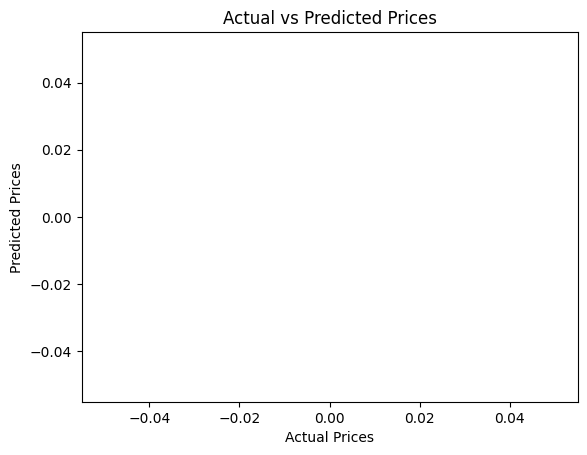

In [112]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()